<a href="https://colab.research.google.com/github/RizkyPutraKurniawan24/Machine-Learning/blob/master/Supervised%20Learning/Regression/Multiple%20Linear%20Regression%20Explanation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Import Libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

### **Dataset**

In [ ]:
pizza = {'Diameter' : [6, 8, 10, 14, 18],
         'Hot Level' : ['Normal', 'Hot', 'Very Hot', 'Normal' , 'Very Hot'],
         'Price' : [7, 9, 13, 17.5, 18]}

df = pd.DataFrame(pizza)

### **Check Dataset**

In [ ]:
df.head()

,Diameter,Hot Level,Price
0,6,Normal,7.0
1,8,Hot,9.0
2,10,Very Hot,13.0
3,14,Normal,17.5
4,18,Very Hot,18.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Diameter   5 non-null      int64  
 1   Hot Level  5 non-null      object 
 2   Price      5 non-null      float64
dtypes: float64(1), int64(1), object(1)
memory usage: 248.0+ bytes


In [ ]:
df.shape

(5, 3)

In [ ]:
df.describe()

,Diameter,Price
count,5.000000,5.000000
mean,11.200000,12.900000
std,4.816638,4.929503
min,6.000000,7.000000
25%,8.000000,9.000000
50%,10.000000,13.000000
75%,14.000000,17.500000
max,18.000000,18.000000


### **Exploratory Data Analysis (EDA)**

In [ ]:
# Calculate the correlation matrix
correlation_matrix = df.corr()
correlation_matrix

<ipython-input-9-5811ebcaccad>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


,Diameter,Price
Diameter,1.00000,0.95394
Price,0.95394,1.00000


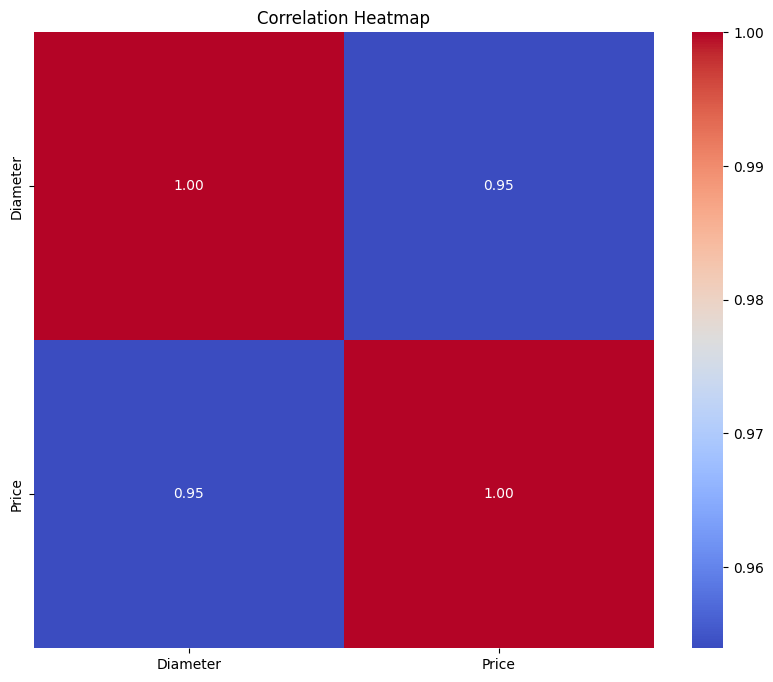

In [ ]:
# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title('Correlation Heatmap')
plt.show()

### **Label Encoder**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Diameter   5 non-null      int64  
 1   Hot Level  5 non-null      object 
 2   Price      5 non-null      float64
dtypes: float64(1), int64(1), object(1)
memory usage: 248.0+ bytes


In [ ]:
from sklearn.preprocessing import LabelEncoder

hot_level_encoder = LabelEncoder()
df['Hot Level'] = hot_level_encoder.fit_transform(df['Hot Level'])

### **Preparation Data**

In [ ]:
# Splitting the dataset into features (X) and target (y)
X = df.drop('Price', axis=1)
y = df['Price']
X.shape , y.shape

((5, 2), (5,))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Splitting Data
X_train = np.array(df[['Diameter', 'Hot Level']])
y_train = np.array(df['Price'])

X_test = np.array(df[['Diameter', 'Hot Level']])
y_test = np.array(df['Price'])

### **Creating the Model**

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

### **Make Predictions**

In [ ]:
# Making predictions
y_pred = model.predict(X_test)

### **Testing New Data**

In [ ]:
# New data
new_data = {'Diameter': [12, 15],
            'Hot Level': [1, 0],}  # Assuming one-hot encoding with columns 'Hot Level_Hot' and 'Hot Level_Very Hot'

# Convert the new data to a DataFrame
new_df = pd.DataFrame(new_data)

# Make predictions on the new data
new_predictions = model.predict(new_df)

print("Pizza price prediction by diameter pizza : 12 and hot level : Hot is Rp.", new_predictions[0])
print("Pizza price prediction by diameter pizza : 15 and hot level : Normal is Rp.", new_predictions[1])

Pizza price prediction by diameter pizza : 12 and hot level : Hot is Rp. 13.609649122807019
Pizza price prediction by diameter pizza : 15 and hot level : Normal is Rp. 16.20614035087719


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


### **Model Equation**

In [ ]:
# Extract the coefficients (slopes) and the intercept
coefficients = model.coef_
intercept = model.intercept_

# Extract feature names
feature_names = X.columns

# Create the equation string
equation = f"Y = {intercept:.2f} "
for i, coef in enumerate(coefficients):
    equation += f" + {coef:.2f} * {feature_names[i]}"

print("Multiple Linear Regression Equation:")
print(equation)

Multiple Linear Regression Equation:
Y = 1.93  + 0.95 * Diameter + 0.26 * Hot Level
